# Tutorial of the Python Control Toolbox

![Control Scheme](/Users/marlonrodriguez/Library/CloudStorage/GoogleDrive-marlon0726@gmail.com/My%20Drive/_PhD/Programming/python/control/images/control_scheme.png "Control System") 

![Control Scheme](/Users/marlonrodriguez/Library/CloudStorage/OneDrive-KULeuven/Programming/py/control_python/images/control_scheme.png "Control System") 

## Example 1 - Dynamic Systems and Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

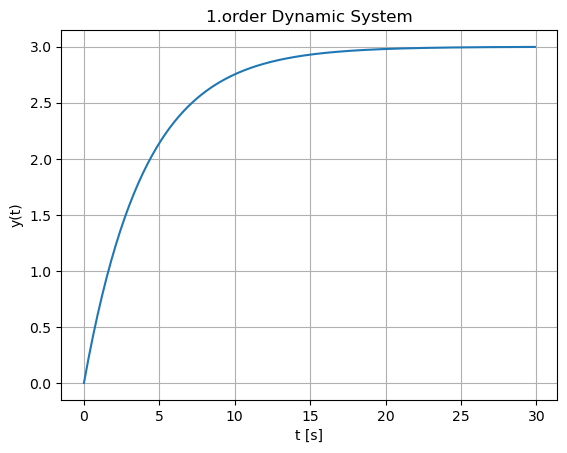

In [2]:
K = 3
T = 4

start = 0
stop = 30
increment = 0.1
t = np.arange(start, stop, increment)

y = K * (1-np.exp(-t/T))

plt.plot(t,y)
plt.title("1.order Dynamic System")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.grid()

Now we solve the differential equiation with Python. The differential equation is:

$$ \dot{y} = \frac{1}{T}\left(-y+Ku\right)$$

With the same constants

In [4]:
from scipy.integrate import odeint

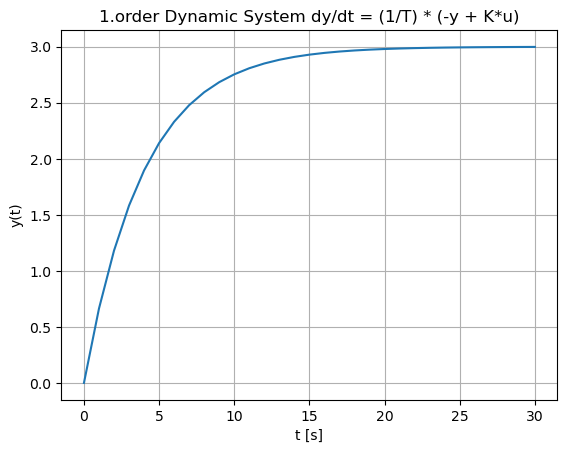

In [15]:
# K = 3
# T = 4
u = 1
tstart = 0
tstop = 30
increment = 1
y0 = 0
t = np.arange(tstart, tstop + 1, increment)

# Function that returns dx/dt
def system1order(y, t, K, T, u):
    dydt = (1/T) * (-y + K*u)
    return dydt

# Solve ODE
x = odeint(system1order, y0, t, args= (K, T, u))

# Plot the results

plt.plot(t,x)
plt.title("1.order Dynamic System dy/dt = (1/T) * (-y + K*u)")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.grid()


Now we try the discretization method where the Euler forward method is implemented

![Discretization](/Users/marlonrodriguez/Library/CloudStorage/GoogleDrive-marlon0726@gmail.com/My%20Drive/_PhD/Programming/python/control/images/euler_forward.png "Euler forward method") 



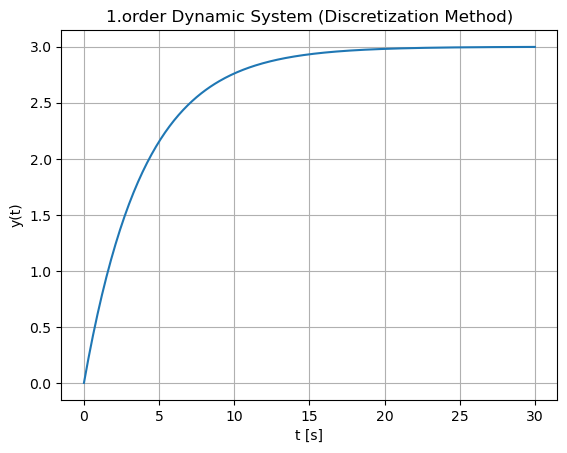

In [18]:
a = -1/T
b = K/T

# Simulation Parameters
Ts = 0.1
Tstop = 30
uk = 1 # Step Response
yk = 0 # Initial Value
N = int(Tstop/Ts) # Simulation Length
data = []
data.append(yk)

# Simulation
for k in range(N):
    yk1 = (1 + a*Ts) * yk + Ts * b * uk
    yk = yk1
    data.append(yk1)

t = np.arange(0, tstop + Ts, Ts)

plt.plot(t,data)
plt.title("1.order Dynamic System (Discretization Method)")
plt.xlabel("t [s]")
plt.ylabel("y(t)")
plt.grid()